<a href="https://colab.research.google.com/github/AnovaYoung/usd_projects/blob/main/Cleaning_%26_EDA_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [ ]:
df_raw = pd.read_csv("/Users/anovayoungers/Downloads/individual+household+electric+power+consumption.zip", delimiter = ";")

/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_3401/2070997847.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("/Users/anovayoungers/Downloads/individual+household+electric+power+consumption.zip", delimiter = ";")


In [ ]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [ ]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [ ]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [ ]:
# Combine Date and Time into 'Datetime'
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original 'D & T' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)


In [ ]:
#convert all data columns to numeric types

columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce') #coerce will turn any non-numeric values into NaN


Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [ ]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [ ]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
Date                             object
Time                             object
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [ ]:
df.Date[0]

datetime.date(2006, 12, 16)

In [ ]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [ ]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

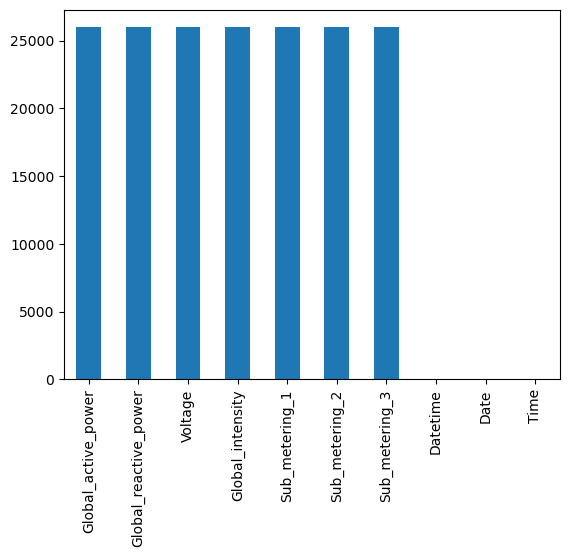

In [ ]:
df.isna().sum().plot.bar()

In [ ]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

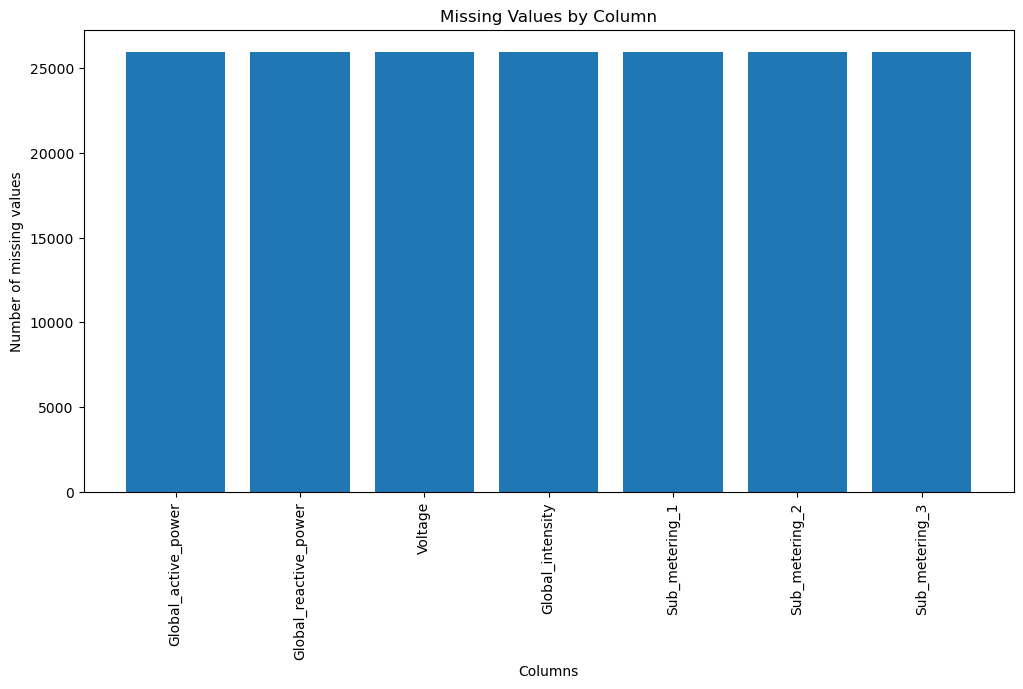

In [ ]:
# Ensure 'Date' is in datetime format for plotting purposes
df['Date'] = pd.to_datetime(df['Datetime'].dt.date)

# Group Date and sum the missing values
df_na = df.isna().sum(axis=0).reset_index()
df_na.columns = ['Column', 'MissingValues']

# Filter out the rows where 'MissingValues' is 0
df_na = df_na[df_na['MissingValues'] > 0]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_na['Column'], df_na['MissingValues'])
plt.xticks(rotation=90)
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.show()

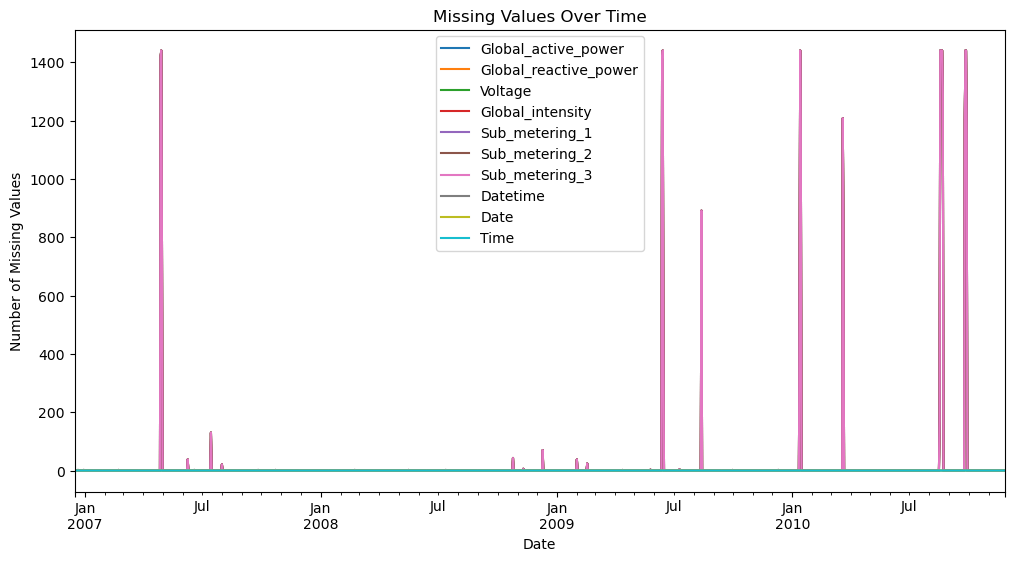

In [ ]:
# New dataframe that sums the missing values for each date
df_na_over_time = df.isna().groupby(df['Date']).sum()

# Plotting the number of missing values for each day
df_na_over_time.plot(figsize=(12, 6), title='Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.show()


**Q: What do you notice about the pattern of missing data?**

A: The missing data appears to be intermittent, with certain days having a high number of missing values. This might indicate issues with data collection on specific days. It also seems that when data is missing for one column, it is often missing for several others at the same time. That could mean that entire readings are missing, rather than random individual values within each column.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: I'm going to tru forward and back fill. It's a very simple method that propagates the last known non-null value forward or the next known value backward.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [ ]:
# Forward fill
df_ffill = df.fillna(method='ffill')

# Backward fill
df_bfill = df.fillna(method='bfill')



In [ ]:
missing_after_ffill = df_ffill.isna().sum()
missing_after_bfill = df_bfill.isna().sum()


print("\nMissing values after forward fill:\n", missing_after_ffill)
print("\nMissing values after backward fill:\n", missing_after_bfill)


Missing values after forward fill:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Date                     0
Time                     0
dtype: int64

Missing values after backward fill:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Date                     0
Time                     0
dtype: int64


In [ ]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-05 19:13:27.255191040
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 00:00:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:00:00
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 00:00:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 00:00:00
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 00:00:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: Global_active_power: Total active power consumed by the household. High consumption periods may indicate specific events or behaviors.
Global_reactive_power: This complements the active power and can give insights into the type of loads being used in the household.
Voltage: This could show us variations in the supply and may correlate with the power usage patterns.
Global_intensity: This is proportional to the total current consumed and can directly relate to the active power consumption.
These variables can be interesting to compare over time as they directly relate to energy consumption and might reveal usage patterns, anomalies, or correlations in household electrical consumption.

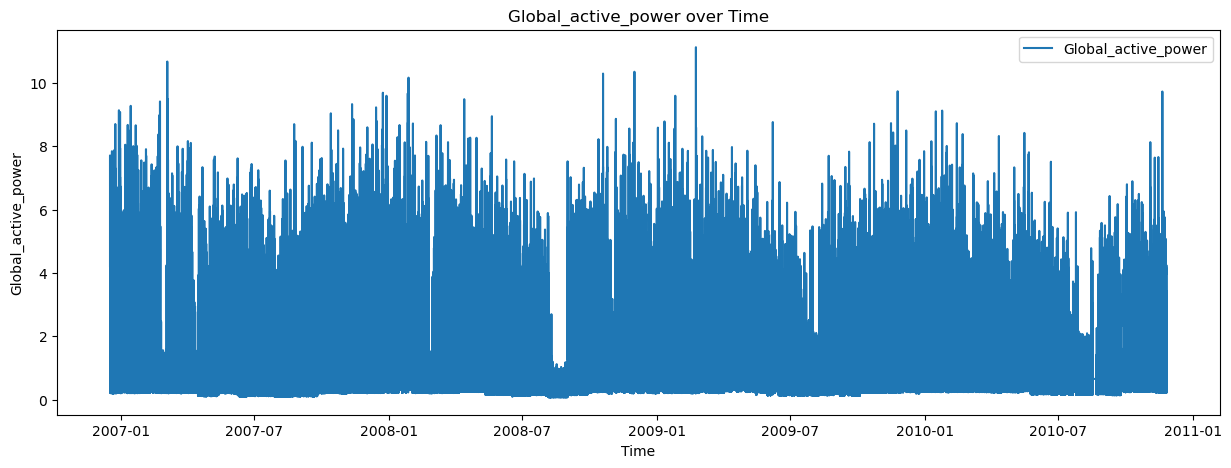

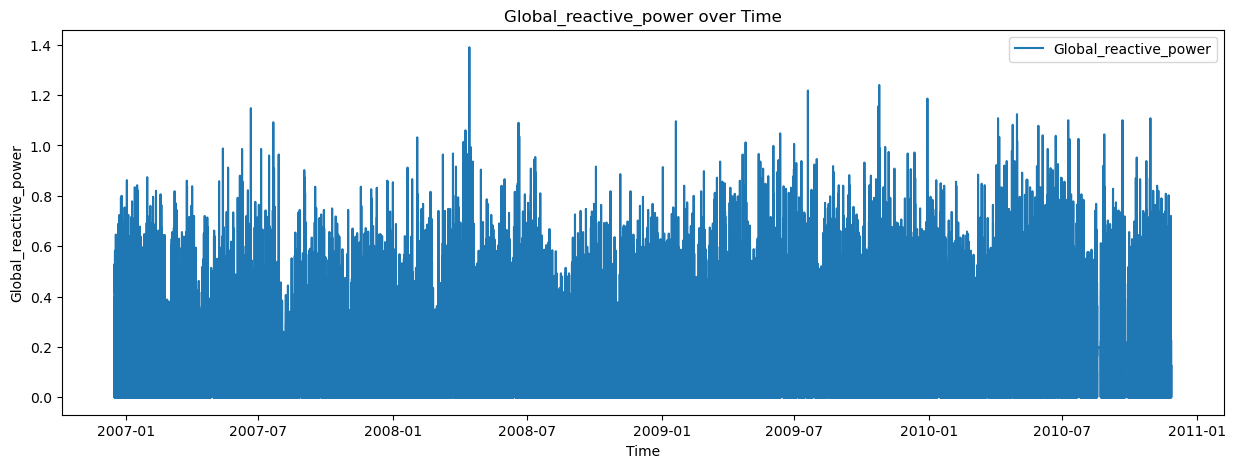

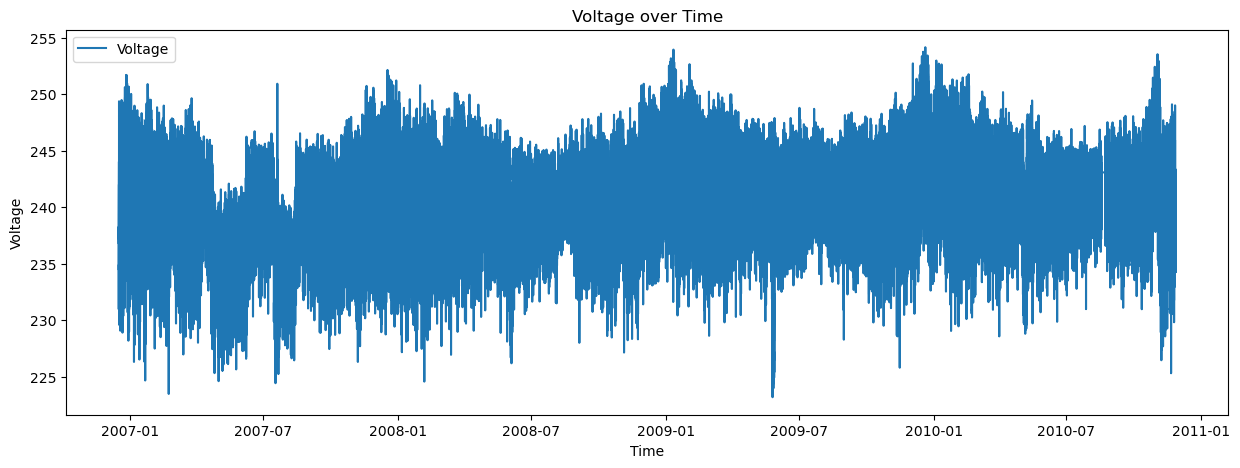

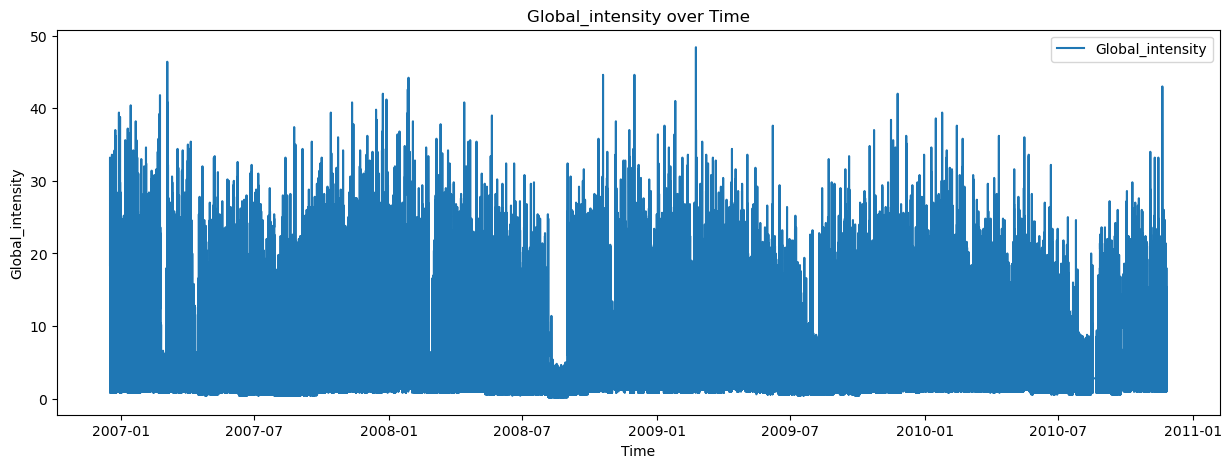

In [ ]:
import matplotlib.pyplot as plt

# Check if 'Datetime' is the index, if not, set it as the index
if df_bfill.index.name != 'Datetime':
    if 'Datetime' in df_bfill.columns:
        df_bfill.set_index('Datetime', inplace=True)
    else:
        # If 'Datetime' is neither a column nor the index, raise an informative error
        raise KeyError("The 'Datetime' column is missing from your dataframe. Please check your dataframe.")

# Plotting each variable over time
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

for variable in variables_to_plot:
    plt.figure(figsize=(15, 5))
    plt.plot(df_bfill[variable], label=variable)
    plt.title(f'{variable} over Time')
    plt.xlabel('Time')
    plt.ylabel(variable)
    plt.legend()
    plt.show()




**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: The plots show a lot of variability, with spikes and dips that make it difficult to discern long-term trends. Also, day-to-day fluctuations may introduce a lot of noise which can obscure the underlying trend. The granularity of the data is also quite fine, which is excellent for detailed analysis but not as useful for identifying broader patterns over time.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [ ]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Set 'Datetime' as the index since I keep having trouble with Datetime
if df_bfill.index.name != 'Datetime':
    df_bfill.set_index('Datetime', inplace=True)

# Resample data to monthly frequency, taking the mean for each month
df_monthly_avg = df_bfill.resample('M').mean()


/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_3401/1966794783.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_avg = df_bfill.resample('M').mean()


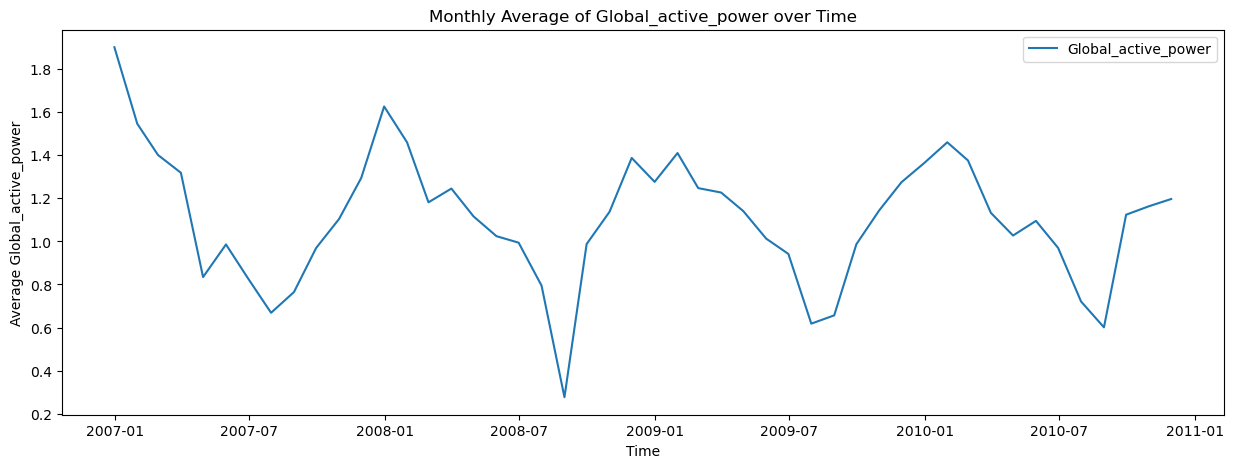

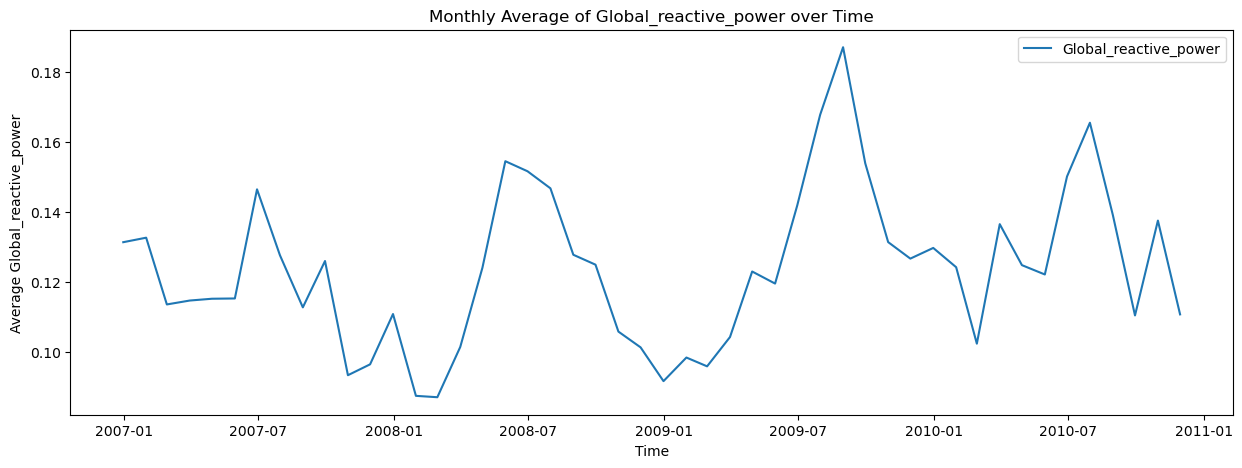

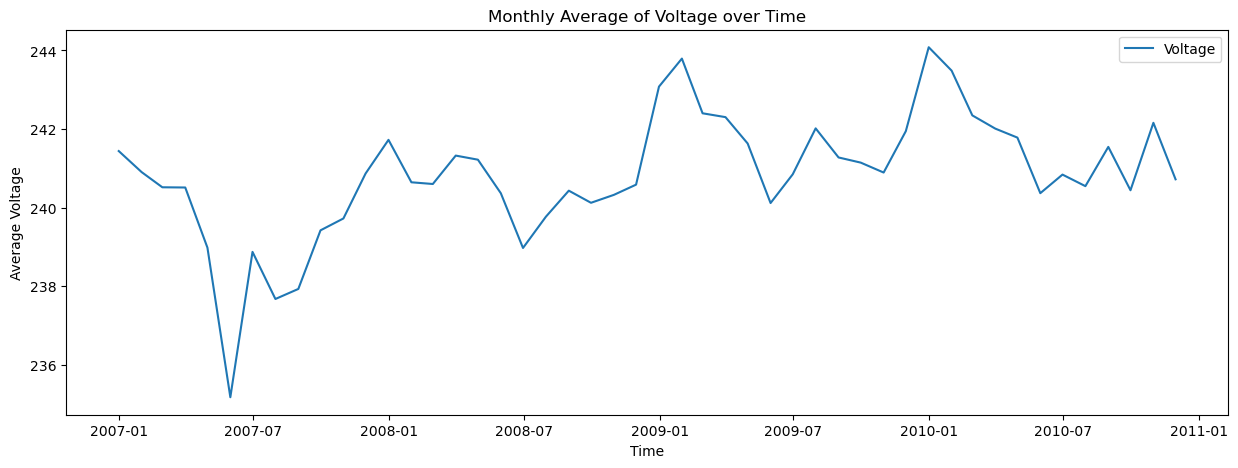

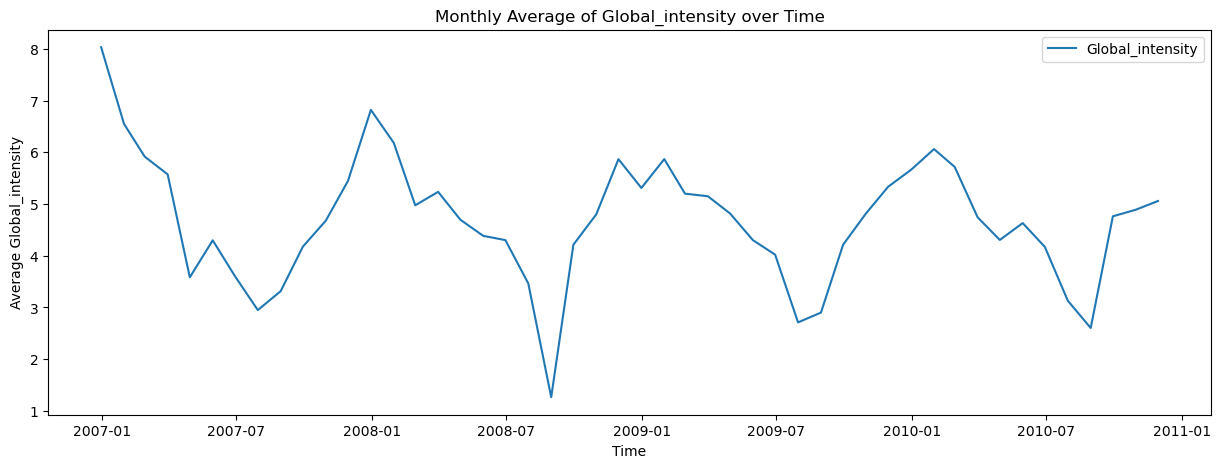

In [ ]:
#build your linechart here

for variable in variables_to_plot:
    plt.figure(figsize=(15, 5))
    plt.plot(df_monthly_avg.index, df_monthly_avg[variable], label=variable)
    plt.title(f'Monthly Average of {variable} over Time')
    plt.xlabel('Time')
    plt.ylabel(f'Average {variable}')
    plt.legend()
    plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: There might be seasonal patterns, especially noticeable with the peaks and troughs that appear to align with certain times of the year. This is common in household energy usage due to heating in winter and cooling in summer. There could be trends over the years such as an overall increase or decrease in energy consumption or voltage levels, which could be due to changes in the household or the devices being used.
Some of the variables like 'Global_active_power' and 'Global_intensity', seem to move together, which makes sense as they are related to the amount of electrical current being used.
**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [ ]:
#compute your moving average here

rolling_window = 30 * 1440  # 30 days * 1440 minutes per day
df_rolling_avg = df_bfill.rolling(window=rolling_window, min_periods=1).mean()


/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_3401/2396730118.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Time'], dtype='object')
  df_rolling_avg = df_bfill.rolling(window=rolling_window, min_periods=1).mean()


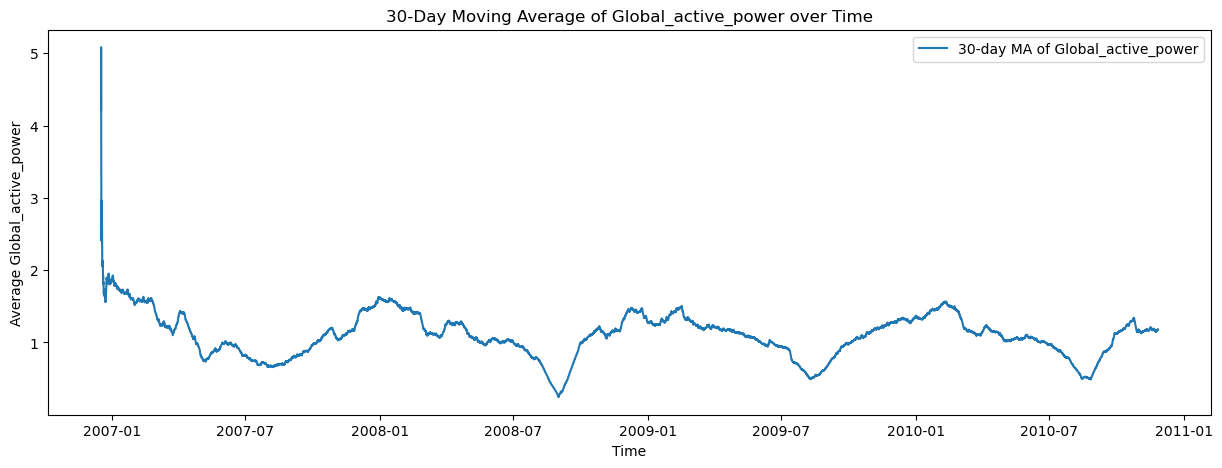

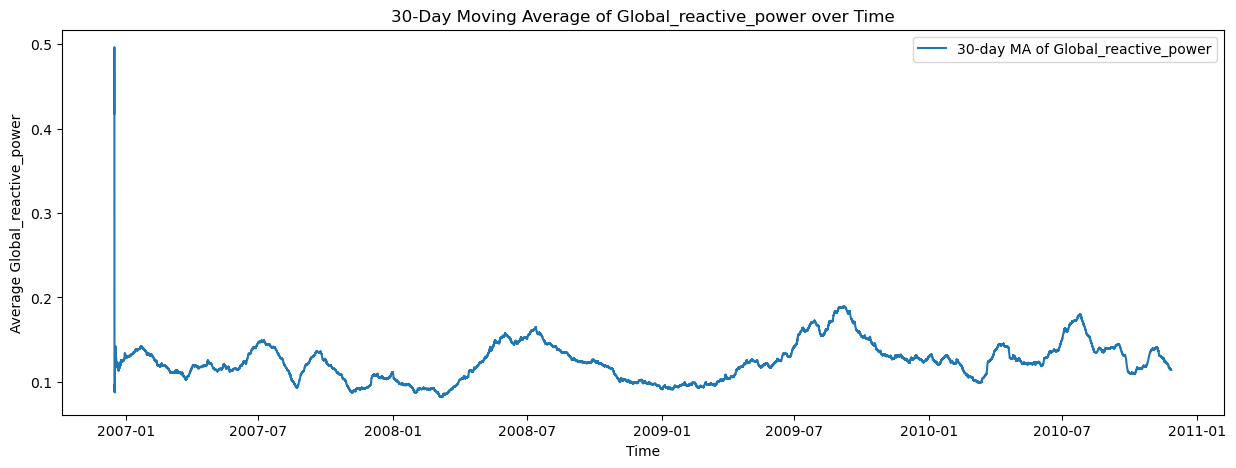

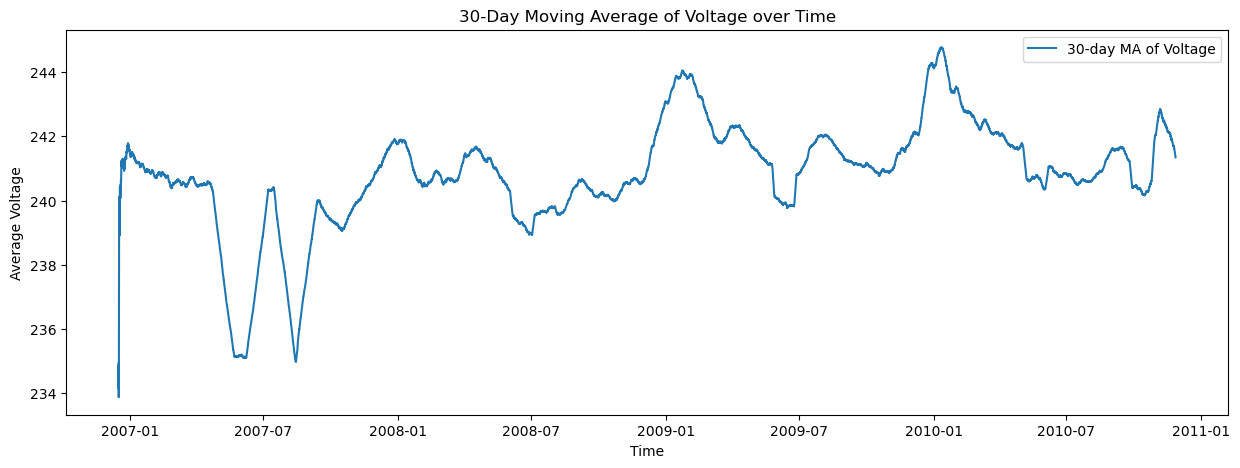

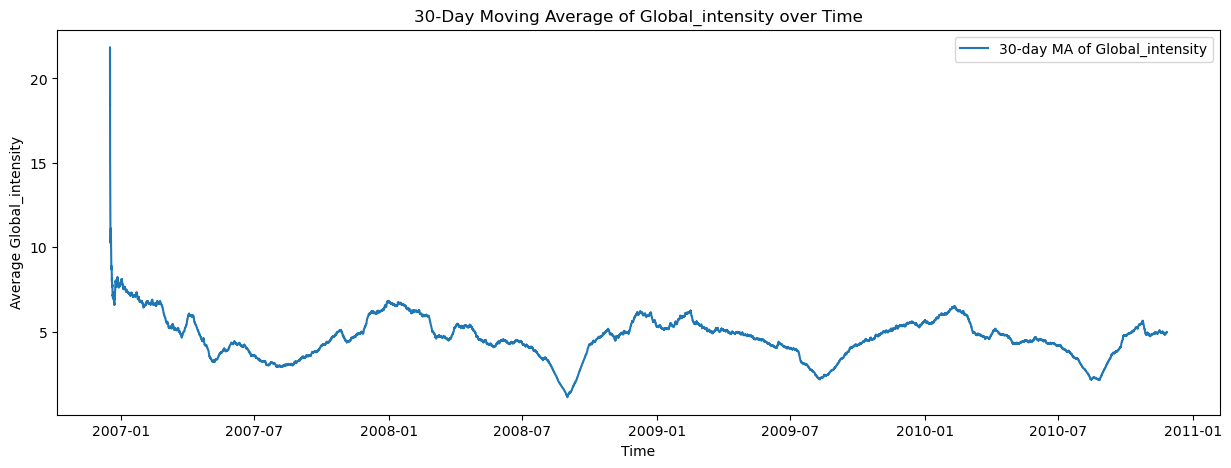

In [ ]:
#build your line chart on the moving average here

for variable in variables_to_plot:
    plt.figure(figsize=(15, 5))
    plt.plot(df_rolling_avg.index, df_rolling_avg[variable], label=f'30-day MA of {variable}')
    plt.title(f'30-Day Moving Average of {variable} over Time')
    plt.xlabel('Time')
    plt.ylabel(f'Average {variable}')
    plt.legend()
    plt.show()


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The 30-day moving average plots smooth out the daily fluctuations and highlight the underlying trends way more effectively than the daily data. Compared to the monthly average, the moving average provides a more granular view of how the data evolves over time. The plots indicate that there are indeed noticeable trends and potentially some seasonal variation, especially in variables such as Global_active_power and Global_intensity, which seem to peak around the same time each year.


## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

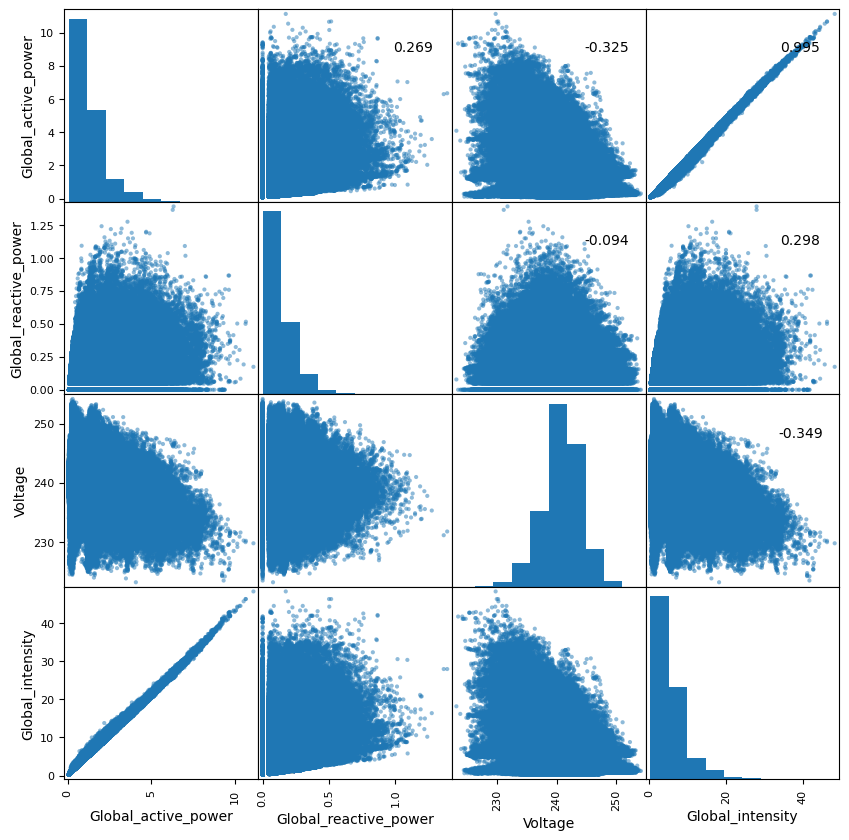

In [ ]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

Global_active_power vs. Global_intensity: These two variables have a strong positive correlation represented by the correlation coefficient (close to 1) and the scatter plot showing a clear linear pattern. This makes sense because global intensity (current) should be directly proportional to the active power.

Global_reactive_power: This variable doesn't show a strong linear relationship with other variables, which suggests that reactive power consumption doesn't increase in a linear way with active power or intensity. This might indicate that the household appliances that consume reactive power do so independently of the ones that consume active power. Which is an interesting thought.

Voltage: The correlation with other variables is weak to moderate, and the scatter plots do not show a clear pattern. This suggests that voltage fluctuations are relatively independent of the consumption patterns for the active and reactive power.

Histograms: The histograms along the diagonal show the distribution of each variable. Global_active_power and Global_intensity have a right-skewed distribution meaning there are periods of high consumption but most of the time the consumption is moderate too low. Global_reactive_power also has a right-skewed distribution but with a less pronounced tail, indicating less variability in reactive power usage. The Voltage distribution is more bell-shaped, indicating that it stays within a narrower range.

